In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)


pd.set_option('display.max_columns', 150)

In [2]:
raw_data = pd.read_csv('Data_set.csv',encoding='cp949')

In [3]:
raw_data.shape

(100233, 69)

* row: 100,233
* columns : 69
* 아이디와 target을 제외하고 변수는 67개

In [4]:
raw_data.head()

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_OCCP_NAME_G,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,TOT_CRLN_AMT,TOT_REPY_AMT,CRLN_OVDU_RATE,CRLN_30OVDU_RATE,LT1Y_CLOD_RATE,STRT_CRDT_GRAD,LTST_CRDT_GRAD,PREM_OVDU_RATE,LT1Y_PEOD_RATE,AVG_STLN_RATE,STLN_REMN_AMT,LT1Y_STLN_AMT,LT1Y_SLOD_RATE,GDINS_MON_PREM,SVINS_MON_PREM,FMLY_GDINS_MNPREM,FMLY_SVINS_MNPREM,MAX_MON_PREM,TOT_PREM,FMLY_TOT_PREM,CNTT_LAMT_CNT,LT1Y_CTLT_CNT,AUTR_FAIL_MCNT,FYCM_PAID_AMT,FMLY_CLAM_CNT,FMLY_PLPY_CNT,AGE,SEX,AVG_CALL_TIME,AVG_CALL_FREQ,TEL_MBSP_GRAD,ARPU,MON_TLFE_AMT,CBPT_MBSP_YN,MOBL_FATY_PRC,TEL_CNTT_QTR,NUM_DAY_SUSP,CRMM_OVDU_AMT,TLFE_UNPD_CNT,LT1Y_MXOD_AMT,PAYM_METD,LINE_STUS,MOBL_PRIN
0,1,0,1,0,0,0,9001,9001,9001,0,1,0,2,13,3,420001,공무원,5400,7700,4,1,24.0,주부,0,0,0,0,0,0,0,0,0,0,12,20미만,0,0,0,0,190000,0,190000,0,190000,20000000,20000000,0,0,10,0,0,0,50,1,450,493,NaN,30000,80000,N,800000,20111,0,0,0,0,O,U,580000
1,2,0,1,0,0,0,24001,0,24001,0,0,0,2,121,0,0,자영업,5500,8100,4,2,29.0,주부,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,110000,0,0,7000000,36000000,0,0,0,300000,2,5,50,1,81,22,NaN,30000,40000,N,500000,20143,0,0,0,0,O,U,90000
2,3,0,0,1,3,2,15001,9001,0,3001,1,25,4,121,0,0,주부,0,4900,4,1,34.0,2차산업 종사자,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,100000,11000000,11000000,0,0,0,0,0,2,60,2,139,17,NaN,30000,40000,Y,500000,20103,0,0,0,0,O,U,120000
3,4,1,0,2,4,2,6001,3001,0,3001,1,25,4,61,0,0,학생,0,10100,2,1,0.0,NaN,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,4000000,4000000,0,0,0,0,0,1,35,1,1118,0,NaN,30000,80000,N,900000,20144,0,540000,0,630000,G,S,320000
4,5,0,4,0,0,0,21001,15001,21001,0,1,0,1,97,0,0,공무원,4800,4800,4,1,14.0,주부,0,0,0,0,0,0,0,0,0,0,0,0,95,2000000,0,0,0,0,0,0,300000,4000000,4000000,0,0,0,500000,2,1,45,1,396,354,W,50000,80000,Y,800000,20131,0,130000,0,90000,G,U,410000


In [5]:
copy_data = raw_data[:]

In [6]:
copy_data


,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_OCCP_NAME_G,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,TOT_CRLN_AMT,TOT_REPY_AMT,CRLN_OVDU_RATE,CRLN_30OVDU_RATE,LT1Y_CLOD_RATE,STRT_CRDT_GRAD,LTST_CRDT_GRAD,PREM_OVDU_RATE,LT1Y_PEOD_RATE,AVG_STLN_RATE,STLN_REMN_AMT,LT1Y_STLN_AMT,LT1Y_SLOD_RATE,GDINS_MON_PREM,SVINS_MON_PREM,FMLY_GDINS_MNPREM,FMLY_SVINS_MNPREM,MAX_MON_PREM,TOT_PREM,FMLY_TOT_PREM,CNTT_LAMT_CNT,LT1Y_CTLT_CNT,AUTR_FAIL_MCNT,FYCM_PAID_AMT,FMLY_CLAM_CNT,FMLY_PLPY_CNT,AGE,SEX,AVG_CALL_TIME,AVG_CALL_FREQ,TEL_MBSP_GRAD,ARPU,MON_TLFE_AMT,CBPT_MBSP_YN,MOBL_FATY_PRC,TEL_CNTT_QTR,NUM_DAY_SUSP,CRMM_OVDU_AMT,TLFE_UNPD_CNT,LT1Y_MXOD_AMT,PAYM_METD,LINE_STUS,MOBL_PRIN
0,1,0,1,0,0,0,9001,9001,9001,0,1,0,2,13,3,420001,공무원,5400,7700,4,1,24.0,주부,0,0,0,0,0,0,0,0,0,0,12,20미만,0,0,0,0,190000,0,190000,0,190000,20000000,20000000,0,0,10,0,0,0,50,1,450,493,NaN,30000,80000,N,800000,20111,0,0,0,0,O,U,580000
1,2,0,1,0,0,0,24001,0,24001,0,0,0,2,121,0,0,자영업,5500,8100,4,2,29.0,주부,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,110000,0,0,7000000,36000000,0,0,0,300000,2,5,50,1,81,22,NaN,30000,40000,N,500000,20143,0,0,0,0,O,U,90000
2,3,0,0,1,3,2,15001,9001,0,3001,1,25,4,121,0,0,주부,0,4900,4,1,34.0,2차산업 종사자,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,100000,11000000,11000000,0,0,0,0,0,2,60,2,139,17,NaN,30000,40000,Y,500000,20103,0,0,0,0,O,U,120000
3,4,1,0,2,4,2,6001,3001,0,3001,1,25,4,61,0,0,학생,0,10100,2,1,0.0,NaN,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,4000000,4000000,0,0,0,0,0,1,35,1,1118,0,NaN,30000,80000,N,900000,20144,0,540000,0,630000,G,S,320000
4,5,0,4,0,0,0,21001,15001,21001,0,1,0,1,97,0,0,공무원,4800,4800,4,1,14.0,주부,0,0,0,0,0,0,0,0,0,0,0,0,95,2000000,0,0,0,0,0,0,300000,4000000,4000000,0,0,0,500000,2,1,45,1,396,354,W,50000,80000,Y,800000,20131,0,130000,0,90000,G,U,410000
5,6,0,1,0,1,1,141001,27001,111001,0,1,1,4,121,0,0,3차산업 종사자,4400,7700,2,2,0.0,단순 사무직,3300,0,0,0,0,0,0,0,0,0,25,0,0,0,0,0,100000,0,190000,0,190000,1000000,6000000,0,0,0,300000,1,1,45,1,268,179,Q,60000,80000,N,400000,20154,0,0,0,0,O,U,170000
6,7,0,0,1,2,1,12001,3001,0,9001,121,121,2,121,1,6001,주부,0,7700,5,3,19.0,2차산업 종사자,4400,1,200106,4000000,4000000,81,14,0,0,0,71,10미만,94,3000000,2000000,10,0,200000,300000,200000,200000,11000000,33000000,0,0,1,800000,0,0,40,2,744,535,W,50000,120000,N,900000,20143,0,120000,0,290000,G,U,720000
7,8,0,1,0,0,0,3001,3001,3001,0,1,0,2,121,0,0,기업/단체 임원,0,10300,3,1,24.0,사무직,5000,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,60000,4000000,4000000,0,0,0,0,0,1,60,1,309,221,R,10000,70000,Y,900000,20021,0,0,0,0,O,U,40000
8,9,0,2,0,0,0,273001,273001,273001,0,37,0,5,121,0,0,주부,0,7600,4,1,9.0,전문직,5400,0,0,0,0,0,0,0,0,0,3,10미만,0,0,0,0,0,60000,0,60000,60000,2000000,2000000,0,0,0,0,0,0,40,2,314,179,R,60000,70000,Y,0,20131,0,0,0,0,O,U,0
9,10,0,0,1,1,0,9001,9001,0,9001,1,1,3,25,0,0,단순 사무직,4700,12400,4,1,14.0,기업/단체 임원,7500,0,0,0,0,0,0,0,0,0,15,10미만,99,0,3000000,30,300000,0,300000,0,340000,36000000,36000000,0,0,21,300000,1,2,40,1,0,0,NaN,0,0,N,800000,20133,0,0,0,0,O,U,0


# 1. target(상환여부 비율)의 확인
* label이 매우 불균형(95.7 : 4.3)한 데이터셋임을 알 수 있다

In [7]:
x = raw_data.TARGET.values
#y = raw_data.TARGET.
#sns.distplot(x, y)

target = pd.DataFrame(raw_data['TARGET'].value_counts())
t_sum = target['TARGET'].sum()
target['per'] = target['TARGET']/t_sum
target

,TARGET,per
0,95946,0.95723
1,4287,0.04277


# 2. 데이터 전처리
- 데이터의 최소값, 최대값, 평균, 분산, 상관관계 등의 특징을 파악하고 이상치를 제거하는 것이 필수적인 과정
- 데이터의 배경이나 목적에 따라 결측치 처리, 이상치 제거, 변수 재정의
- 데이터 성질에 따라 단위를 바꾸거나 명목, 서열, 구간 데이터의 형태를 변경, 혹은 일자를 기간으로 나타내는 등

## 1) nan값 확인

In [8]:
pd.DataFrame(raw_data.isnull().sum()).T

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_OCCP_NAME_G,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,TOT_CRLN_AMT,TOT_REPY_AMT,CRLN_OVDU_RATE,CRLN_30OVDU_RATE,LT1Y_CLOD_RATE,STRT_CRDT_GRAD,LTST_CRDT_GRAD,PREM_OVDU_RATE,LT1Y_PEOD_RATE,AVG_STLN_RATE,STLN_REMN_AMT,LT1Y_STLN_AMT,LT1Y_SLOD_RATE,GDINS_MON_PREM,SVINS_MON_PREM,FMLY_GDINS_MNPREM,FMLY_SVINS_MNPREM,MAX_MON_PREM,TOT_PREM,FMLY_TOT_PREM,CNTT_LAMT_CNT,LT1Y_CTLT_CNT,AUTR_FAIL_MCNT,FYCM_PAID_AMT,FMLY_CLAM_CNT,FMLY_PLPY_CNT,AGE,SEX,AVG_CALL_TIME,AVG_CALL_FREQ,TEL_MBSP_GRAD,ARPU,MON_TLFE_AMT,CBPT_MBSP_YN,MOBL_FATY_PRC,TEL_CNTT_QTR,NUM_DAY_SUSP,CRMM_OVDU_AMT,TLFE_UNPD_CNT,LT1Y_MXOD_AMT,PAYM_METD,LINE_STUS,MOBL_PRIN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,464,0,0,0,0,1027,45709,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46015,0,0,0,0,0,0,0,0,0,2833,0,0


### (1) OCCP_NAME_G

* 직업란에 '기타'가 따로 있는데 결손값이 생긴 이유는 무엇일까, 정보제공에 거부를 한 것일까, 불로소득이 있는 무직인 것인가. 
* 이 사람의 위치를 파악하기 위해 다음의 항목을 다른 사람과 비교한다
> 추정소득, 신용대출 연체율, 연령

In [9]:
check_data = raw_data[['OCCP_NAME_G', 'CUST_JOB_INCM', 'CRLN_OVDU_RATE', 'AGE']]
check_data.head()

,OCCP_NAME_G,CUST_JOB_INCM,CRLN_OVDU_RATE,AGE
0,공무원,5400,0,50
1,자영업,5500,0,50
2,주부,0,0,60
3,학생,0,0,35
4,공무원,4800,0,45


In [10]:
# null포함 데이터
null_data = check_data.loc[check_data['OCCP_NAME_G'].isnull()]
null_data.describe()


,CUST_JOB_INCM,CRLN_OVDU_RATE
count,464.000000,464.000000
mean,3602.801724,0.771552
std,1707.059638,7.149708
min,0.000000,0.000000
25%,3300.000000,0.000000
50%,4000.000000,0.000000
75%,4700.000000,0.000000
max,6600.000000,99.000000


In [11]:
null_data

,OCCP_NAME_G,CUST_JOB_INCM,CRLN_OVDU_RATE,AGE
180,NaN,4100,0,35
363,NaN,0,0,65
377,NaN,5200,0,45
634,NaN,0,0,60
1206,NaN,3900,0,40
1286,NaN,4500,0,45
1361,NaN,0,0,65
1417,NaN,3000,0,25
1546,NaN,3900,0,55
1620,NaN,5900,0,45


In [12]:
labels = []
 # 직업 비율 확인
for occ in check_data['OCCP_NAME_G']:
    if occ not in labels:
        labels.append(occ)
        
               
count_data = pd.DataFrame(check_data.groupby('OCCP_NAME_G').size().reset_index())

count_data['per'] = (count_data[0] / len(check_data['OCCP_NAME_G']))*100
count_data

,OCCP_NAME_G,0,per
0,*,1189,1.186236
1,1차산업 종사자,1178,1.175262
2,2차산업 종사자,9601,9.578682
3,3차산업 종사자,8275,8.255764
4,고소득 전문직,1223,1.220157
5,공무원,5091,5.079166
6,기업/단체 임원,1041,1.038580
7,기타,1672,1.668113
8,단순 노무직,821,0.819092
9,단순 사무직,4107,4.097453


- 가장 높은 비율을 차지하는 것은 주부, 그다음은 사무직, 다음은 자영업과 2차산업 종사자 임을 알 수 있다
- 낮은비율로는 예체능계,단순 노무직, 임원, 기타, 1차산업 종사자, 그리고 결손값임을 알 수 있다
<br><br>
- 또한 직업 결손값의 연체율은 전체의 평균에 비해 낮은 편이고, 연령대도 중년인 것을 보아 불로소득이 있지 않을까 추정 해 본다 (임대료 같은)

In [13]:
check_data.describe()

,CUST_JOB_INCM,CRLN_OVDU_RATE
count,100233.000000,100233.000000
mean,2788.233416,2.522213
std,2472.287102,12.153939
min,0.000000,0.000000
25%,0.000000,0.000000
50%,3600.000000,0.000000
75%,4700.000000,0.000000
max,10000.000000,100.000000


In [14]:
check_data.loc[check_data['OCCP_NAME_G']=='*']

,OCCP_NAME_G,CUST_JOB_INCM,CRLN_OVDU_RATE,AGE
22,*,3700,0,*
23,*,0,0,*
103,*,4300,0,45
114,*,5100,0,50
165,*,8900,0,*
276,*,4200,0,*
288,*,3100,0,*
326,*,0,0,*
385,*,3100,0,*
498,*,0,0,*


In [15]:
check_data.loc[check_data['OCCP_NAME_G']=='*'].describe()

,CUST_JOB_INCM,CRLN_OVDU_RATE
count,1189.000000,1189.000000
mean,3236.417157,1.983179
std,2875.961724,11.530141
min,0.000000,0.000000
25%,0.000000,0.000000
50%,3900.000000,0.000000
75%,5100.000000,0.000000
max,10000.000000,92.000000


In [588]:
# 직업이 '기타'인 사람들과 비교해 본다
check_data.loc[check_data['OCCP_NAME_G']=='기타']

,OCCP_NAME_G,CUST_JOB_INCM,CRLN_OVDU_RATE,AGE
94,기타,0,0,45
105,기타,0,0,60
120,기타,0,0,60
279,기타,0,0,35
366,기타,0,0,65
393,기타,0,0,40
462,기타,0,0,65
633,기타,0,0,30
744,기타,0,0,60
917,기타,0,0,65


In [589]:
check_data.loc[check_data['OCCP_NAME_G']=='기타'].describe()

,CUST_JOB_INCM,CRLN_OVDU_RATE
count,1672.0,1672.000000
mean,0.0,4.131579
std,0.0,15.232471
min,0.0,0.000000
25%,0.0,0.000000
50%,0.0,0.000000
75%,0.0,0.000000
max,0.0,99.000000


* '기타'는 직업에 기반한 추정소득이 0이고, 신용대출 연체율이 전체집단보다 많이 높은 것을보아 '무직'이라고 추정할 수 있다.


In [16]:
check_data.isnull().sum()


OCCP_NAME_G       464
CUST_JOB_INCM       0
CRLN_OVDU_RATE      0
AGE                 0
dtype: int64

In [17]:
check_data['OCCP_NAME_G'].value_counts()


주부          27565
사무직         16581
2차산업 종사자     9601
자영업          9485
3차산업 종사자     8275
공무원          5091
전문직          5043
단순 사무직       4107
학생           3835
운전직          2126
기타           1672
고소득 전문직      1223
*            1189
1차산업 종사자     1178
기업/단체 임원     1041
예체능계 종사자      936
단순 노무직        821
Name: OCCP_NAME_G, dtype: int64

#### '*'와 null 을 한 집단으로 묶는다 -> '비식별'

In [19]:


check_data['OCCP_NAME_G'].fillna('비식별', inplace=True)
check_data['OCCP_NAME_G'].replace({'*':'비식별'}, inplace=True)
check_data

/Users/sherryjeon/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/sherryjeon/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3813: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,OCCP_NAME_G,CUST_JOB_INCM,CRLN_OVDU_RATE,AGE
0,공무원,5400,0,50
1,자영업,5500,0,50
2,주부,0,0,60
3,학생,0,0,35
4,공무원,4800,0,45
5,3차산업 종사자,4400,0,45
6,주부,0,81,40
7,기업/단체 임원,0,0,60
8,주부,0,0,40
9,단순 사무직,4700,0,40


In [20]:
copy_data['OCCP_NAME_G'] = check_data['OCCP_NAME_G']

### (2) LAST_CHLD_AGE 
* 막내자녀 생일

In [21]:
print ("nan 의 개수는 {}".format(copy_data['LAST_CHLD_AGE'].isnull().sum()))
print (copy_data['LAST_CHLD_AGE'].value_counts())

nan 의 개수는 1027
0.0     50125
24.0    10774
19.0     9651
29.0     7905
14.0     5801
34.0     5600
39.0     4297
9.0      2862
44.0     1221
4.0       544
49.0      330
54.0       46
60.0       33
59.0       17
Name: LAST_CHLD_AGE, dtype: int64


* 중요한 값이 아니고, 추정 근거가 없으므로 0으로 채운다 (자녀가 없다고 볼 수 있을 듯)


In [22]:
copy_data['LAST_CHLD_AGE'].fillna(0, inplace=True)

### (3) MATE_OCCP_NAME_G
* 배우자의 직엄
* 본인의 직업과 마찬가지로 NUll과 *이 따로 표기되어 있다

In [23]:
print (copy_data['MATE_OCCP_NAME_G'].value_counts())
print ("결손값의 개수 {}".format(copy_data['MATE_OCCP_NAME_G'].isnull().sum()))

주부          11683
사무직         10053
2차산업 종사자     8107
자영업          6380
3차산업 종사자     4011
운전직          2887
공무원          2400
전문직          2105
1차산업 종사자     1411
단순 사무직       1316
*            1027
기업/단체 임원      931
고소득 전문직       560
단순 노무직        549
기타            534
예체능계 종사자      461
학생            109
Name: MATE_OCCP_NAME_G, dtype: int64
결손값의 개수 45709


In [24]:
print ('결손값의 비율은 {}'. format(((copy_data['MATE_OCCP_NAME_G'].isnull().sum())/len(copy_data['MATE_OCCP_NAME_G'])*100)))

결손값의 비율은 45.60274560274561


* 배우자 직업이 없는 것은 미혼으로 볼 수 있는 것인지 하기 항목과 함께 본다
* 배우자 추정소득, 실 가족원수, 연령

In [25]:
check_data = copy_data[['MATE_OCCP_NAME_G', 'MATE_JOB_INCM', 'ACTL_FMLY_NUM','AGE']]
check_data.loc[check_data['MATE_OCCP_NAME_G'].isnull()].describe()

,MATE_JOB_INCM,ACTL_FMLY_NUM
count,45709.000000,45709.000000
mean,35.734757,1.846726
std,406.279763,0.947748
min,0.000000,1.000000
25%,0.000000,1.000000
50%,0.000000,2.000000
75%,0.000000,3.000000
max,8400.000000,7.000000


* 결손값의 실 가족구성원을 봤을 때 미혼으로 처리할 수 있을 것 같다


In [26]:
check_data['MATE_OCCP_NAME_G'].fillna('미혼', inplace=True)
check_data

/Users/sherryjeon/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,MATE_OCCP_NAME_G,MATE_JOB_INCM,ACTL_FMLY_NUM,AGE
0,주부,0,4,50
1,주부,0,4,50
2,2차산업 종사자,0,4,60
3,미혼,0,2,35
4,주부,0,4,45
5,단순 사무직,3300,2,45
6,2차산업 종사자,4400,5,40
7,사무직,5000,3,60
8,전문직,5400,4,40
9,기업/단체 임원,7500,4,40


In [27]:
check_data.loc[check_data['MATE_OCCP_NAME_G']=='*'].describe()

,MATE_JOB_INCM,ACTL_FMLY_NUM
count,1027.000000,1027.000000
mean,3046.153846,3.399221
std,2777.869994,1.079816
min,0.000000,2.000000
25%,0.000000,3.000000
50%,3900.000000,3.000000
75%,5000.000000,4.000000
max,10000.000000,7.000000


In [28]:
check_data.loc[check_data['MATE_OCCP_NAME_G']=='기타'].describe()

,MATE_JOB_INCM,ACTL_FMLY_NUM
count,534.000000,534.000000
mean,45.505618,3.383895
std,470.328242,1.064788
min,0.000000,2.000000
25%,0.000000,2.000000
50%,0.000000,3.000000
75%,0.000000,4.000000
max,5600.000000,7.000000


* 기타와 *를 비교해 보았을 때 기타는 무직일 가능성이 높고, *은 비식별로 바꾸어야 할 것 같다

In [29]:
check_data['MATE_OCCP_NAME_G'].replace({'*':'비식별'}, inplace=True)

copy_data['MATE_OCCP_NAME_G'] = check_data['MATE_OCCP_NAME_G']

/Users/sherryjeon/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3813: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


### (4)TEL_MBSP_GRAD
* 멤버쉽 등급

In [30]:
print (copy_data['TEL_MBSP_GRAD'].value_counts())
print ("결손값 개수:{}".format(copy_data['TEL_MBSP_GRAD'].isnull().sum()))

R    19862
W    16692
Q    13641
E     4023
Name: TEL_MBSP_GRAD, dtype: int64
결손값 개수:46015


* skt 멤버쉽은 4단계로 나누어져 있는데 반정도의 결손값은 일반등급이거나, 현재 아직 등급이 생성되지 않았다고 판단, none의 N으로 채운다

In [31]:
copy_data['TEL_MBSP_GRAD'].fillna('N', inplace=True)

### (5) PAYM_METD
* 납부방법

In [32]:
print(copy_data['PAYM_METD'].value_counts())
print ("결손값개수 :{}".format(copy_data['PAYM_METD'].isnull().sum()))


O    56919
K    32364
G     4541
R     3576
Name: PAYM_METD, dtype: int64
결손값개수 :2833


* 카테고리 변수는 추정할 수 없으므로 'N'으로 치환한다

In [33]:
copy_data['PAYM_METD'].fillna('N', inplace=True)

### (6) AGE
* 나이

In [34]:
print (copy_data['AGE'].isnull().sum())
print (copy_data['AGE'].value_counts())


0
45    19052
50    17734
55    15321
40    14807
35    12003
60     9190
30     5268
65     3584
25     2201
*       430
70      403
20      240
Name: AGE, dtype: int64


* 결손값은 평균으로 채울 수 있다

In [35]:
for_mean= list(filter(lambda x: x !='*', copy_data['AGE']))
age_count = len(for_mean)
from functools import reduce
#for_mean = reduce((lambda x, y:x+y), for_mean)

for_mean=list(map(int, for_mean))
for_mean = reduce((lambda x, y:x+y), for_mean)
age_mean = int(for_mean/age_count) # 다른 값들이 정수형이기 때문에 정수형으로 계산한다
print ("*을 제외한 나이의 평균: {}".format(age_mean))

*을 제외한 나이의 평균: 46


In [36]:
copy_data['AGE'].replace({'*':age_mean}, inplace=True)



### (7) SEX
* 비식별 정보를 추정할 수 있는 보조변수로 하기의 변수를 함께 본다
* 직업, 배우자직업, 연봉


In [37]:
copy_data['SEX'].value_counts()



2    54490
1    45313
*      430
Name: SEX, dtype: int64

In [38]:
check_data = copy_data[['SEX', 'OCCP_NAME_G', 'MATE_OCCP_NAME_G', 'CUST_JOB_INCM']]
print ("추정 소득의 기술통계량 \n:{}".format(copy_data['CUST_JOB_INCM'].describe()))


추정 소득의 기술통계량 
:count    100233.000000
mean       2788.233416
std        2472.287102
min           0.000000
25%           0.000000
50%        3600.000000
75%        4700.000000
max       10000.000000
Name: CUST_JOB_INCM, dtype: float64


In [39]:
check_data.head(10)

,SEX,OCCP_NAME_G,MATE_OCCP_NAME_G,CUST_JOB_INCM
0,1,공무원,주부,5400
1,1,자영업,주부,5500
2,2,주부,2차산업 종사자,0
3,1,학생,미혼,0
4,1,공무원,주부,4800
5,1,3차산업 종사자,단순 사무직,4400
6,2,주부,2차산업 종사자,0
7,1,기업/단체 임원,사무직,0
8,2,주부,전문직,0
9,1,단순 사무직,기업/단체 임원,4700


* 편견이 들어가기는 하지만, 전체 소득의 중앙값보다 적으면 여자, 많으면 남자로 구분한다 (대신 추정소득이 3600이하인 사람 중, 배우자의 직업이 주부인 사람은 남자로 구분한다)
* 직업이나 배우자 직업도 거의 비식별 처리가 되었기 때문이다

In [41]:
check_list1 = check_data['SEX'].tolist()
check_list2 = check_data['CUST_JOB_INCM'].tolist()
check_list3 = check_data['MATE_OCCP_NAME_G'].tolist()

for i, val in enumerate(check_list1): # 인덱스와 값을 가져옴
    if val == '*':
        if check_list2[i]>3600:
            check_list1[i] = '1'
        elif check_list3[i] =='주부':
            check_list1[i] = '1'
        else:
            check_list1[i] = '2'
            
        
check_data['SEX'] = check_list1
#check_data['SEX'] = check_data['SEX'][check_data.CUST_JOB_INCM.values>3600].replace({'*':1})
#check_data['SEX'] = check_data['SEX'][check_data.MATE_OCCP_NAME_G=='주부'].replace({'*':1})
#check_data['SEX'].replace({'*':2}, inplace=True)

/Users/sherryjeon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [42]:
check_data['SEX'].value_counts()

2    54719
1    45514
Name: SEX, dtype: int64

In [43]:
copy_data['SEX'] = check_data['SEX']

## 2) 질적변수 처리
* 카테고리변수, 구간변수, 일자 혹은 시간은 기간으로

### (1) 시간, 일자 
* MIN_CNTT_DATE : 한화 생명의 최초 대출날짜 (최초의 신용대출 년월)
* CTCD_OCCR_MDIF : 신카 개설일로부터 유지개월수
* CRDT_OCCR_MDIF : 신용대출 최근 개설일로부터 현재까지 유지 개월수
* SPTCT_OCCR_MDIF : 2산업분류 신용대출계좌 유지개월수
* TEL_CNTT_QTR : 가입년월 분기 (분기는 3을 곱해서 격차를 주는 걸로 한다)




#### MIN_CNTT_DATE

In [44]:
check_data = copy_data [['MIN_CNTT_DATE', 'CTCD_OCCR_MDIF', 'CRDT_OCCR_MDIF','SPTCT_OCCR_MDIF' ]]


In [45]:
check_data.head(10)

,MIN_CNTT_DATE,CTCD_OCCR_MDIF,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF
0,0,13,1,0
1,0,121,0,0
2,0,121,1,25
3,0,61,1,25
4,0,97,1,0
5,0,121,1,1
6,200106,121,121,121
7,0,121,1,0
8,0,121,37,0
9,0,25,1,1


In [46]:
check_data.MIN_CNTT_DATE.value_counts()

0         90366
200103      202
200102      201
200208      200
200207      196
200109      194
200112      182
200101      176
200210      176
200108      172
200206      170
200205      161
200111      160
200106      160
200107      157
200203      151
200211      150
200110      147
200209      142
200212      137
200204      132
200202      130
200104      128
200304      127
200012      122
200201      119
200105      118
200305      107
200303       93
200301       93
          ...  
200907       18
200901       17
200505       17
201405       17
200509       17
200412       17
201604       17
200902       16
200906       16
200904       16
201408       16
200504       16
200007       16
200003       15
200701       15
200510       15
200905       15
200401       14
200501       13
200006       13
200507       13
199910       12
200707       12
200702       10
199911        8
199912        8
200001        7
200002        6
200604        6
200004        3
Name: MIN_CNTT_DATE, Len

* 보험사의 신용대출이기 때문에 1/10 정도밖에 기록이 없다. 또한 은행권과 다르게 보험사의 신용대출이 긍정적인 점수를 매길 것이라 생각하지 않는다. 일단 관계를 살펴봐야 하므로 현재까지로 개월수를 바꾼다.

In [47]:
#현재시간
from datetime import datetime
cur_year = datetime.today().year
cur_mon = datetime.today().month
cur = (cur_year*12) + cur_mon
cur # 이 값을 기준으로 한다

24214

In [48]:
#데이터의 연월을 변환
check_data['MIN_CNTT_DATE']=pd.DataFrame(((check_data['MIN_CNTT_DATE'].values/100).astype(int)) * 12 + (check_data['MIN_CNTT_DATE'].values%100))



/Users/sherryjeon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [49]:
check_data_list = check_data['MIN_CNTT_DATE'].tolist()


In [50]:
#cur-check_data.loc[check_data.MIN_CNTT_DATE!=0]
for i,val in enumerate(check_data_list):
    if val != 0:
        check_data_list[i] = cur-val
        
check_data.loc[:,'MIN_CNTT_DATE']= pd.DataFrame(check_data_list)
#check_data['MIN_CNTT_DATE']=pd.DataFrame(check_data_list)

/Users/sherryjeon/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [51]:
copy_data['MIN_CNTT_DATE_duration'] = check_data['MIN_CNTT_DATE']

#### TEL_CNTT_QTR


In [52]:

check_data = pd.DataFrame(copy_data['TEL_CNTT_QTR'])

#데이터의 연월을 변환
check_data['TEL_CNTT_QTR']=pd.DataFrame(((check_data['TEL_CNTT_QTR'].values/10).astype(int)) * 12 + ((check_data['TEL_CNTT_QTR'].values%10)*3))



In [53]:
check_data_list = check_data['TEL_CNTT_QTR'].tolist()
#cur-check_data.loc[check_data.MIN_CNTT_DATE!=0]
for i,val in enumerate(check_data_list):
    if val != 0:
        check_data_list[i] = cur-val
        
check_data.loc[:,'TEL_CNTT_QTR']= pd.DataFrame(check_data_list)
check_data.head()
#check_data['MIN_CNTT_DATE']=pd.DataFrame(check_data_list)

,TEL_CNTT_QTR
0,79
1,37
2,85
3,34
4,55


In [54]:
copy_data['TEL_CNTT_QTR_duration'] = check_data['TEL_CNTT_QTR']

### (3) LT1Y_PEOD_RATE

In [55]:
check_data = copy_data['LT1Y_PEOD_RATE'].tolist()


In [57]:
for i, val in enumerate(check_data):
    if val != 0:
        check_data[i] = int(check_data[i][:2])
temp = pd.DataFrame(check_data)       

In [58]:
temp.rename(columns={0:'LT1Y_PEOD_RATE'}, inplace=True)
temp.head()

,LT1Y_PEOD_RATE
0,20
1,0
2,0
3,0
4,0


In [59]:
copy_data['LT1Y_PEOD_RATE'] = temp
copy_data.head()

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_OCCP_NAME_G,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,TOT_CRLN_AMT,TOT_REPY_AMT,CRLN_OVDU_RATE,CRLN_30OVDU_RATE,LT1Y_CLOD_RATE,STRT_CRDT_GRAD,LTST_CRDT_GRAD,PREM_OVDU_RATE,LT1Y_PEOD_RATE,AVG_STLN_RATE,STLN_REMN_AMT,LT1Y_STLN_AMT,LT1Y_SLOD_RATE,GDINS_MON_PREM,SVINS_MON_PREM,FMLY_GDINS_MNPREM,FMLY_SVINS_MNPREM,MAX_MON_PREM,TOT_PREM,FMLY_TOT_PREM,CNTT_LAMT_CNT,LT1Y_CTLT_CNT,AUTR_FAIL_MCNT,FYCM_PAID_AMT,FMLY_CLAM_CNT,FMLY_PLPY_CNT,AGE,SEX,AVG_CALL_TIME,AVG_CALL_FREQ,TEL_MBSP_GRAD,ARPU,MON_TLFE_AMT,CBPT_MBSP_YN,MOBL_FATY_PRC,TEL_CNTT_QTR,NUM_DAY_SUSP,CRMM_OVDU_AMT,TLFE_UNPD_CNT,LT1Y_MXOD_AMT,PAYM_METD,LINE_STUS,MOBL_PRIN,MIN_CNTT_DATE_duration,TEL_CNTT_QTR_duration
0,1,0,1,0,0,0,9001,9001,9001,0,1,0,2,13,3,420001,공무원,5400,7700,4,1,24.0,주부,0,0,0,0,0,0,0,0,0,0,12,20,0,0,0,0,190000,0,190000,0,190000,20000000,20000000,0,0,10,0,0,0,50,1,450,493,N,30000,80000,N,800000,20111,0,0,0,0,O,U,580000,0,79
1,2,0,1,0,0,0,24001,0,24001,0,0,0,2,121,0,0,자영업,5500,8100,4,2,29.0,주부,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,110000,0,0,7000000,36000000,0,0,0,300000,2,5,50,1,81,22,N,30000,40000,N,500000,20143,0,0,0,0,O,U,90000,0,37
2,3,0,0,1,3,2,15001,9001,0,3001,1,25,4,121,0,0,주부,0,4900,4,1,34.0,2차산업 종사자,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,100000,11000000,11000000,0,0,0,0,0,2,60,2,139,17,N,30000,40000,Y,500000,20103,0,0,0,0,O,U,120000,0,85
3,4,1,0,2,4,2,6001,3001,0,3001,1,25,4,61,0,0,학생,0,10100,2,1,0.0,미혼,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,4000000,4000000,0,0,0,0,0,1,35,1,1118,0,N,30000,80000,N,900000,20144,0,540000,0,630000,G,S,320000,0,34
4,5,0,4,0,0,0,21001,15001,21001,0,1,0,1,97,0,0,공무원,4800,4800,4,1,14.0,주부,0,0,0,0,0,0,0,0,0,0,0,0,95,2000000,0,0,0,0,0,0,300000,4000000,4000000,0,0,0,500000,2,1,45,1,396,354,W,50000,80000,Y,800000,20131,0,130000,0,90000,G,U,410000,0,55


## 3) 변수간의 관계 파악

### (1) 변수의 종류


#### continuous features ( 연속형)
1 금액관련 변수 <br>
1) TOT_LNIF_AMT: 산출일 기준 총 대출금액 <br>
2) TOT_CLIF_AMT : 산출일 기준 총 신용 대출금액(천원)<br>
3) BNK_LNIF_AMT : 은행권 대출 금액 (천원) - 긍정 <br>
4) CPT_LNIF_AMT : 카드,할부, 캐피탈 대출 금액 (천원) - 부정 <br>
5) CB_GUIF_AMT : 보증총금액 (서울보증보험)(천원) - 일반적으로 담보  <br>
6) CUST_JOB_INCM : 직업정보기반 추정소득 (만원) <br>
7) HSHD_INFR_INCM : 가구추정소득, 가계 합산  (만원) <br>
8) MATE_JOB_INCM : 직업, 주소기반 추정의 배우자 추정소득(만원) <br>
9) TOT_CRLN_AMT : 한화생명 신용대출 금액 (원)<br>
10) TOT_REPY_AMT : 한화생명 신용 상환금액 (원) <br>
11) STLN_REMN_AMT : 약관대출 가능금액 (실제 약관대출 실행한 금액제외, 가능한 잔액)(원)<br>
12) LT1Y_STLN_AMT : 최근1년 약대금액(약대받은금액) (원) <br>
13) GDINS_MON_PREM : 비연금저축월납입 보험료(보장성 월납환산-일시납제외)(원) <br>
14) SVINS_MON_PREM : 연금(저축성월납환산-일시납제외) (원)<br>
15) FMLY_GDINS_MNPREM : 가계합산기준 보장성 월납환산(원) <br>
16) FMLY_SVINS_MNPREM : 가계합산 저축성 월납(원)<br>
17) MAX_MON_PREM : 최대 월 납입보험료(기준일 이전납입한 월 납입 보험료 중 최대보험료(원) <br>
18) TOT_PREM : 기 납입보험료(유효한 계약의 총 납입보험료) (원) <br>
19) FMLY_TOT_PREM : 가구기납입 보험료 (가계합산 기준 유효한 계약 총 납입보험료)(원) <br>
20) FYCM_PAID_AMT : 가고 총 지급 보험금액 (가계합산)(원) <br>
21) ARPU : 가입자매출(월기준 회선당 평균수익금, 음수면 -1)(원) 통신사 수익인듯 <br> 
22) MON_TLFE_AMT : 납부요금(월기준 서비스 납부요금)(원) <br>
23) MOBL_FATY_PRC : 단말기가격(원) <br>
24) CRMM_OVDU_AMT :당월 연체금액(해당월 납부요금 연체금액)(원)<br>
25) LT1Y_MXOD_AMT : 년간 최대 연체금액(납부요금 연체금액 중 최대 연체금액)(원)<br>
26) MOBL_PRIN : 남은 할부금 (원) <br>

2 건수 <br>
1) BNK_LNIF_CNT : 은행권 대출건수 <br>
2) CPT_LNIF_CNT: 카드사/할부사/캐피탈 대출건수 <br>
3) SPART_LNIF_CNT : 2산업분류 대출건수 <br>
4) ECT_LNIF_CNT : 기타 금융권 대출건수 <br>
5) CRDT_OCCR_MDIF : 신용대출 최근 개설일부터 유지개월수 <br>
6) SPTCT_OCCR_MDIF : 2산업분류 신용대출계좌 유지개월수 <br>
7) CRDT_CARD_CNT : 신용카드 발급수 <br>
8) CTCD_OCCR_MDIF : 신용카드 개설일부터 유지개월수 <br>
9) CB_GUIF_CNT: 보증 총 건수(서울보증보험) <br>
10) ACTL_FMLY_NUM: 실 가족원수 <br>
11) CUST_FMLY_NUM : 보험가입 가족원수 <br>
12) CRDT_LOAN_CNT  : 한화생명 신용대출건수  <br>
13) CNTT_LAMT_CNT : 실효해지건수(계약해지, 또는 실효난 계약건수 ) <br>
14) LT1Y_CTLT_CNT : 최근 1년 실효해지건수 <br>
15) AUTR_FAIL_MCNT :  자동이체 실패월수 <br>
16) FMLY_CLAM_CNT: 가구 총 보험금 청구건수 <br>
17) FMLY_PLPY_CNT : 가구 만기완납 경험횟수 <br>


<br><br>
3 비율 <br>
1) CRLN_OVDU_RATE : 한화생명 신용대출 연체율 (경과월수 중 연체경험월수 비율) <br>
2) CRLN_30OVDU_RATE : 30일이내 연체경험월 / 30일이내 신용대출월수 * 100 <br>
3) LT1Y_CLOD_RATE : 최근1년 신용대출 연체율 (최근1년 연체경험월 / 최근 1년 신용대출월) *100 <br>
4) PREM_OVDU_RATE : 보험료 연체율 (연체보험횟수 / 총납입 보험횟수) <br>
5) LT1Y_PEOD_RATE : 최근1년 보헌료 연체율 (최근 1년 연체납입횟수 / 총 납입횟수) * 100 <br>
6) AVG_STLN_RATE : 평균약대율 (월별 약관대출 금액 중 약관대출 받은 금액의 비율의 연중평균) <br>
7) LT1Y_SLOD_RATE : 최근1년 약대 연체율 (약관대출 연체경험월수 / 1년약관대출월수)*100<br>


<br><br>
4 등급<br>
1) STRT_CRDT_GRAD : 최초신용등급(가장 오래된 대출시점의 신용등급) <br>
2) LTST_CRDT_GRAD : 최근 신용등급(가장 최근시점 신용등급) <br>


5 특성  <br>
1) ACTL_FMLY_NUM: 막내자녀 나이 <br>
2) AGE : 나이 <br>

<br><br>
6 통신
1) AVG_CALL_TIME: 월 통화시간(월평균 통화시간 분단위) <br>
2) AVG_CALL_FREQ : 월 통화빈도(월평균 통화횟수) <br>
3) NUM_DAY_SUSP : 정지일수(회선의 사용정지일수) <br>
4) TLFE_UNPD_CNT : 납부일 미준수 횟수(핸드폰 납부요금의 납입일 미준수 횟수) <br>
<br><br>
7 기간<br>
1) MIN_CNTT_DATE : 한화생명 최초 신용대출 날짜
2) TEL_CNTT_QTR : SKT가입년월_분기

#### categorical features ( 질적)
1) OCCP_NAME_G : 직업 <br>
2) MATE_OCCP_NAME_G: 배우자 직업<br>
3) SEX : 성별<br>
4) TEL_MBSP_GRAD : 통신사 멤버쉽 등급<br>
5) CBPT_MBSP_YN : 통신사 결합상품 가입여부 <br>
6) PAYM_METD : 통신요금 납부방법 <br>
7) LINE_STUS : 현재 회선상태 <br>

#### 대출금액 -raw
* 'TOT_LNIF_AMT','TOT_CLIF_AMT','BNK_LNIF_AMT', 'CPT_LNIF_AMT'
* 'CB_GUIF_AMT', 'TOT_CRLN_AMT', 'TOT_REPY_AMT', 'LT1Y_STLN_AMT','MOBL_PRIN', 'STLN_REMN_AMT '

* 데이터가 밀집되어 이상치의 수가 줄어든 것을 볼 수 있다

### (2) 단위 맞추기
1) TOT_LNIF_AMT: 산출일 기준 총 대출금액 <br>
2) TOT_CLIF_AMT : 산출일 기준 총 신용 대출금액(천원)<br>
3) BNK_LNIF_AMT : 은행권 대출 금액 (천원) - 긍정 <br>
4) CPT_LNIF_AMT : 카드,할부, 캐피탈 대출 금액 (천원) - 부정 <br>
5) CB_GUIF_AMT : 보증총금액 (서울보증보험)(천원) - 일반적으로 담보  <br>
6) CUST_JOB_INCM : 직업정보기반 추정소득 (만원) <br>
7) HSHD_INFR_INCM : 가구추정소득, 가계 합산  (만원) <br>
8) MATE_JOB_INCM : 직업, 주소기반 추정의 배우자 추정소득(만원) <br>
9) TOT_CRLN_AMT : 한화생명 신용대출 금액 (원)<br>
10) TOT_REPY_AMT : 한화생명 신용 상환금액 (원) <br>
11) STLN_REMN_AMT : 약관대출 가능금액 (실제 약관대출 실행한 금액제외, 가능한 잔액)(원)<br>
12) LT1Y_STLN_AMT : 최근1년 약대금액(약대받은금액) (원) <br>
13) GDINS_MON_PREM : 비연금저축월납입 보험료(보장성 월납환산-일시납제외)(원) <br>
14) SVINS_MON_PREM : 연금(저축성월납환산-일시납제외) (원)<br>
15) FMLY_GDINS_MNPREM : 가계합산기준 보장성 월납환산(원) <br>
16) FMLY_SVINS_MNPREM : 가계합산 저축성 월납(원)<br>
17) MAX_MON_PREM : 최대 월 납입보험료(기준일 이전납입한 월 납입 보험료 중 최대보험료(원) <br>
18) TOT_PREM : 기 납입보험료(유효한 계약의 총 납입보험료) (원) <br>
19) FMLY_TOT_PREM : 가구기납입 보험료 (가계합산 기준 유효한 계약 총 납입보험료)(원) <br>
20) FYCM_PAID_AMT : 가고 총 지급 보험금액 (가계합산)(원) <br>
21) ARPU : 가입자매출(월기준 회선당 평균수익금, 음수면 -1)(원) 통신사 수익인듯 <br> 
22) MON_TLFE_AMT : 납부요금(월기준 서비스 납부요금)(원) <br>
23) MOBL_FATY_PRC : 단말기가격(원) <br>
24) CRMM_OVDU_AMT :당월 연체금액(해당월 납부요금 연체금액)(원)<br>
25) LT1Y_MXOD_AMT : 년간 최대 연체금액(납부요금 연체금액 중 최대 연체금액)(원)<br>
26) MOBL_PRIN : 남은 할부금 (원) <br>

#### 단위는 '원'으로 통일한다

In [60]:
#천원 -> 원
loan_feature_1 = ['TOT_LNIF_AMT','TOT_CLIF_AMT','BNK_LNIF_AMT',\
                  'CPT_LNIF_AMT', 'CB_GUIF_AMT']
check_data = copy_data[loan_feature_1]
loan_feature_1_unit = ["unit_{}".format(i) for i in loan_feature_1 ] 


for i,j in zip(loan_feature_1, loan_feature_1_unit):
    #check_data = check_data.assign(j = lambda x: (x[i])*1000)
    if check_data[i].bool != False:
        newcol = (check_data[i])*1000
        check_data[j] = newcol
    

    


/Users/sherryjeon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [62]:
#로그변환

loan_feature_1_unit_log = ["log_{}".format(i) for i in loan_feature_1_unit ] 

# 기존의 데이터에 log 를 취한 column생성


    
for i in loan_feature_1_unit:
    v = 'log_'+i
    check_data[v] = np.log(check_data[i]+1)
    

/Users/sherryjeon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [63]:
#로그변환 취한 데이터를 copy_data에 적용
copy_data[loan_feature_1_unit_log] = check_data[loan_feature_1_unit_log]

In [64]:
#단위 변경 데이터를 적용한다
copy_data[loan_feature_1] = check_data[loan_feature_1_unit]

In [65]:
copy_data.head()

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_OCCP_NAME_G,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,TOT_CRLN_AMT,TOT_REPY_AMT,CRLN_OVDU_RATE,CRLN_30OVDU_RATE,LT1Y_CLOD_RATE,STRT_CRDT_GRAD,LTST_CRDT_GRAD,PREM_OVDU_RATE,LT1Y_PEOD_RATE,AVG_STLN_RATE,STLN_REMN_AMT,LT1Y_STLN_AMT,LT1Y_SLOD_RATE,GDINS_MON_PREM,SVINS_MON_PREM,FMLY_GDINS_MNPREM,FMLY_SVINS_MNPREM,MAX_MON_PREM,TOT_PREM,FMLY_TOT_PREM,CNTT_LAMT_CNT,LT1Y_CTLT_CNT,AUTR_FAIL_MCNT,FYCM_PAID_AMT,FMLY_CLAM_CNT,FMLY_PLPY_CNT,AGE,SEX,AVG_CALL_TIME,AVG_CALL_FREQ,TEL_MBSP_GRAD,ARPU,MON_TLFE_AMT,CBPT_MBSP_YN,MOBL_FATY_PRC,TEL_CNTT_QTR,NUM_DAY_SUSP,CRMM_OVDU_AMT,TLFE_UNPD_CNT,LT1Y_MXOD_AMT,PAYM_METD,LINE_STUS,MOBL_PRIN,MIN_CNTT_DATE_duration,TEL_CNTT_QTR_duration,log_unit_TOT_LNIF_AMT,log_unit_TOT_CLIF_AMT,log_unit_BNK_LNIF_AMT,log_unit_CPT_LNIF_AMT,log_unit_CB_GUIF_AMT
0,1,0,1,0,0,0,9001000,9001000,9001000,0,1,0,2,13,3,420001000,공무원,5400,7700,4,1,24.0,주부,0,0,0,0,0,0,0,0,0,0,12,20,0,0,0,0,190000,0,190000,0,190000,20000000,20000000,0,0,10,0,0,0,50,1,450,493,N,30000,80000,N,800000,20111,0,0,0,0,O,U,580000,0,79,16.012846,16.012846,16.012846,0.000000,19.855768
1,2,0,1,0,0,0,24001000,0,24001000,0,0,0,2,121,0,0,자영업,5500,8100,4,2,29.0,주부,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,110000,0,0,7000000,36000000,0,0,0,300000,2,5,50,1,81,22,N,30000,40000,N,500000,20143,0,0,0,0,O,U,90000,0,37,16.993606,0.000000,16.993606,0.000000,0.000000
2,3,0,0,1,3,2,15001000,9001000,0,3001000,1,25,4,121,0,0,주부,0,4900,4,1,34.0,2차산업 종사자,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,100000,11000000,11000000,0,0,0,0,0,2,60,2,139,17,N,30000,40000,Y,500000,20103,0,0,0,0,O,U,120000,0,85,16.523627,16.012846,0.000000,14.914456,0.000000
3,4,1,0,2,4,2,6001000,3001000,0,3001000,1,25,4,61,0,0,학생,0,10100,2,1,0.0,미혼,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,4000000,4000000,0,0,0,0,0,1,35,1,1118,0,N,30000,80000,N,900000,20144,0,540000,0,630000,G,S,320000,0,34,15.607437,14.914456,0.000000,14.914456,0.000000
4,5,0,4,0,0,0,21001000,15001000,21001000,0,1,0,1,97,0,0,공무원,4800,4800,4,1,14.0,주부,0,0,0,0,0,0,0,0,0,0,0,0,95,2000000,0,0,0,0,0,0,300000,4000000,4000000,0,0,0,500000,2,1,45,1,396,354,W,50000,80000,Y,800000,20131,0,130000,0,90000,G,U,410000,0,55,16.860081,16.523627,16.860081,0.000000,0.000000


In [66]:
# 만원 -> 원

loan_feature_2 = ['CUST_JOB_INCM', 'HSHD_INFR_INCM','MATE_JOB_INCM']
check_data = copy_data[loan_feature_2]
loan_feature_2_unit = ["unit_{}".format(i) for i in loan_feature_2 ] 


for i,j in zip(loan_feature_2, loan_feature_2_unit):
    check_data[j]= list(map(lambda x: x*10000 , check_data[i]))


    

/Users/sherryjeon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [70]:
#로그변환

loan_feature_2_unit_log = ["log_{}".format(i) for i in loan_feature_2_unit ] 

# 기존의 데이터에 log 를 취한 column생성


    
for i in loan_feature_2_unit:
    v = 'log_'+i
    check_data[v] = np.log(check_data[i]+1)
    

/Users/sherryjeon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [71]:
#로그변환 취한 데이터를 copy_data에 적용
copy_data[loan_feature_2_unit_log] = check_data[loan_feature_2_unit_log]
copy_data[loan_feature_2] = check_data[loan_feature_2_unit]

In [72]:
copy_data.head()

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_OCCP_NAME_G,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,TOT_CRLN_AMT,TOT_REPY_AMT,CRLN_OVDU_RATE,CRLN_30OVDU_RATE,LT1Y_CLOD_RATE,STRT_CRDT_GRAD,LTST_CRDT_GRAD,PREM_OVDU_RATE,LT1Y_PEOD_RATE,AVG_STLN_RATE,STLN_REMN_AMT,LT1Y_STLN_AMT,LT1Y_SLOD_RATE,GDINS_MON_PREM,SVINS_MON_PREM,FMLY_GDINS_MNPREM,FMLY_SVINS_MNPREM,MAX_MON_PREM,TOT_PREM,FMLY_TOT_PREM,CNTT_LAMT_CNT,LT1Y_CTLT_CNT,AUTR_FAIL_MCNT,FYCM_PAID_AMT,FMLY_CLAM_CNT,FMLY_PLPY_CNT,AGE,SEX,AVG_CALL_TIME,AVG_CALL_FREQ,TEL_MBSP_GRAD,ARPU,MON_TLFE_AMT,CBPT_MBSP_YN,MOBL_FATY_PRC,TEL_CNTT_QTR,NUM_DAY_SUSP,CRMM_OVDU_AMT,TLFE_UNPD_CNT,LT1Y_MXOD_AMT,PAYM_METD,LINE_STUS,MOBL_PRIN,MIN_CNTT_DATE_duration,TEL_CNTT_QTR_duration,log_unit_TOT_LNIF_AMT,log_unit_TOT_CLIF_AMT,log_unit_BNK_LNIF_AMT,log_unit_CPT_LNIF_AMT,log_unit_CB_GUIF_AMT,log_unit_CUST_JOB_INCM,log_unit_HSHD_INFR_INCM,log_unit_MATE_JOB_INCM
0,1,0,1,0,0,0,9001000,9001000,9001000,0,1,0,2,13,3,420001000,공무원,54000000,77000000,4,1,24.0,주부,0,0,0,0,0,0,0,0,0,0,12,20,0,0,0,0,190000,0,190000,0,190000,20000000,20000000,0,0,10,0,0,0,50,1,450,493,N,30000,80000,N,800000,20111,0,0,0,0,O,U,580000,0,79,16.012846,16.012846,16.012846,0.000000,19.855768,17.804495,18.159316,0.0
1,2,0,1,0,0,0,24001000,0,24001000,0,0,0,2,121,0,0,자영업,55000000,81000000,4,2,29.0,주부,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,110000,0,0,7000000,36000000,0,0,0,300000,2,5,50,1,81,22,N,30000,40000,N,500000,20143,0,0,0,0,O,U,90000,0,37,16.993606,0.000000,16.993606,0.000000,0.000000,17.822844,18.209960,0.0
2,3,0,0,1,3,2,15001000,9001000,0,3001000,1,25,4,121,0,0,주부,0,49000000,4,1,34.0,2차산업 종사자,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,100000,11000000,11000000,0,0,0,0,0,2,60,2,139,17,N,30000,40000,Y,500000,20103,0,0,0,0,O,U,120000,0,85,16.523627,16.012846,0.000000,14.914456,0.000000,0.000000,17.707331,0.0
3,4,1,0,2,4,2,6001000,3001000,0,3001000,1,25,4,61,0,0,학생,0,101000000,2,1,0.0,미혼,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,4000000,4000000,0,0,0,0,0,1,35,1,1118,0,N,30000,80000,N,900000,20144,0,540000,0,630000,G,S,320000,0,34,15.607437,14.914456,0.000000,14.914456,0.000000,0.000000,18.430631,0.0
4,5,0,4,0,0,0,21001000,15001000,21001000,0,1,0,1,97,0,0,공무원,48000000,48000000,4,1,14.0,주부,0,0,0,0,0,0,0,0,0,0,0,0,95,2000000,0,0,0,0,0,0,300000,4000000,4000000,0,0,0,500000,2,1,45,1,396,354,W,50000,80000,Y,800000,20131,0,130000,0,90000,G,U,410000,0,55,16.860081,16.523627,16.860081,0.000000,0.000000,17.686712,17.686712,0.0


### (2) 로그변환취한 값을 적용하기

In [73]:
raw_feature = ['MOBL_PRIN', 'STLN_REMN_AMT','GDINS_MON_PREM', \
               'SVINS_MON_PREM', 'FMLY_GDINS_MNPREM','FMLY_SVINS_MNPREM',\
               'MAX_MON_PREM', 'TOT_PREM', 'FMLY_TOT_PREM',\
                'MON_TLFE_AMT','CRMM_OVDU_AMT',\
               'LT1Y_MXOD_AMT']

check_data = copy_data[raw_feature]

In [74]:

raw_feature_log = ["log_{}".format(i) for i in raw_feature]


for i in raw_feature:
    v = 'log_'+i
    check_data[v] = np.log(check_data[i]+1)

copy_data['ARPU_log'] = np.log(copy_data['ARPU']+2)


/Users/sherryjeon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [75]:
copy_data[raw_feature_log] = check_data[raw_feature_log]

In [76]:
copy_data

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_OCCP_NAME_G,MATE_JOB_INCM,CRDT_LOAN_CNT,MIN_CNTT_DATE,TOT_CRLN_AMT,TOT_REPY_AMT,CRLN_OVDU_RATE,CRLN_30OVDU_RATE,LT1Y_CLOD_RATE,STRT_CRDT_GRAD,LTST_CRDT_GRAD,PREM_OVDU_RATE,LT1Y_PEOD_RATE,AVG_STLN_RATE,STLN_REMN_AMT,LT1Y_STLN_AMT,LT1Y_SLOD_RATE,GDINS_MON_PREM,SVINS_MON_PREM,FMLY_GDINS_MNPREM,FMLY_SVINS_MNPREM,MAX_MON_PREM,TOT_PREM,FMLY_TOT_PREM,CNTT_LAMT_CNT,LT1Y_CTLT_CNT,AUTR_FAIL_MCNT,FYCM_PAID_AMT,FMLY_CLAM_CNT,FMLY_PLPY_CNT,AGE,SEX,AVG_CALL_TIME,AVG_CALL_FREQ,TEL_MBSP_GRAD,ARPU,MON_TLFE_AMT,CBPT_MBSP_YN,MOBL_FATY_PRC,TEL_CNTT_QTR,NUM_DAY_SUSP,CRMM_OVDU_AMT,TLFE_UNPD_CNT,LT1Y_MXOD_AMT,PAYM_METD,LINE_STUS,MOBL_PRIN,MIN_CNTT_DATE_duration,TEL_CNTT_QTR_duration,log_unit_TOT_LNIF_AMT,log_unit_TOT_CLIF_AMT,log_unit_BNK_LNIF_AMT,log_unit_CPT_LNIF_AMT,log_unit_CB_GUIF_AMT,log_unit_CUST_JOB_INCM,log_unit_HSHD_INFR_INCM,log_unit_MATE_JOB_INCM,ARPU_log,log_MOBL_PRIN,log_STLN_REMN_AMT,log_GDINS_MON_PREM,log_SVINS_MON_PREM,log_FMLY_GDINS_MNPREM,log_FMLY_SVINS_MNPREM,log_MAX_MON_PREM,log_TOT_PREM,log_FMLY_TOT_PREM,log_MON_TLFE_AMT,log_CRMM_OVDU_AMT,log_LT1Y_MXOD_AMT
0,1,0,1,0,0,0,9001000,9001000,9001000,0,1,0,2,13,3,420001000,공무원,54000000,77000000,4,1,24.0,주부,0,0,0,0,0,0,0,0,0,0,12,20,0,0,0,0,190000,0,190000,0,190000,20000000,20000000,0,0,10,0,0,0,50,1,450,493,N,30000,80000,N,800000,20111,0,0,0,0,O,U,580000,0,79,16.012846,16.012846,16.012846,0.000000,19.855768,17.804495,18.159316,0.000000,10.309019,13.270785,0.000000,12.154785,0.000000,12.154785,0.000000,12.154785,16.811243,16.811243,11.289794,0.000000,0.000000
1,2,0,1,0,0,0,24001000,0,24001000,0,0,0,2,121,0,0,자영업,55000000,81000000,4,2,29.0,주부,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,110000,0,0,7000000,36000000,0,0,0,300000,2,5,50,1,81,22,N,30000,40000,N,500000,20143,0,0,0,0,O,U,90000,0,37,16.993606,0.000000,16.993606,0.000000,0.000000,17.822844,18.209960,0.000000,10.309019,11.407576,0.000000,0.000000,0.000000,11.608245,0.000000,0.000000,15.761421,17.399030,10.596660,0.000000,0.000000
2,3,0,0,1,3,2,15001000,9001000,0,3001000,1,25,4,121,0,0,주부,0,49000000,4,1,34.0,2차산업 종사자,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,100000,11000000,11000000,0,0,0,0,0,2,60,2,139,17,N,30000,40000,Y,500000,20103,0,0,0,0,O,U,120000,0,85,16.523627,16.012846,0.000000,14.914456,0.000000,0.000000,17.707331,0.000000,10.309019,11.695255,0.000000,0.000000,0.000000,0.000000,0.000000,11.512935,16.213406,16.213406,10.596660,0.000000,0.000000
3,4,1,0,2,4,2,6001000,3001000,0,3001000,1,25,4,61,0,0,학생,0,101000000,2,1,0.0,미혼,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,4000000,4000000,0,0,0,0,0,1,35,1,1118,0,N,30000,80000,N,900000,20144,0,540000,0,630000,G,S,320000,0,34,15.607437,14.914456,0.000000,14.914456,0.000000,0.000000,18.430631,0.000000,10.309019,12.676079,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.201805,15.201805,11.289794,13.199326,13.353477
4,5,0,4,0,0,0,21001000,15001000,21001000,0,1,0,1,97,0,0,공무원,48000000,48000000,4,1,14.0,주부,0,0,0,0,0,0,0,0,0,0,0,0,95,2000000,0,0,0,0,0,0,300000,4000000,4000000,0,0,0,500000,2,1,45,1,396,354,W,50000,80000,Y,800000,20131,0,130000,0,90000,G,U,410000,0,55,16.860081,16.523627,16.860081,0.000000,0.000000,17.686712,17.686712,0.000000,10.819818,12.923915,14.508658,0.000000,0.000000,0.000000,0.000000,12.611541,15.201805,15.201805,11.289794,11.775297,11.407576
5,6,0,1,0,1,1,141001000,27001000,111001000,0,1,1,4,121,0,0,3차산업 종사자,44000000,77000000,2,2,0.0,단순 사무직,33000000,0,0,0,0,0,0,0,0,0,25,0,0,0,0,0,100000,0,190000,0,190000,1000000,6000000,0,0,0,300000,1,1,45,1,268,179,Q,60000,80000,N,400000,20154,0,0,0,0,O,U,170000,0,22,18.764278,17.111384,18.525050,0.000000,0.000000,17.599700,18.159316,17.312018,11.002133,12.043560,0.000000,11.512935,0.000000,12.154785,0.000000,12.154785,13.815512,15.607270,11.

# Pickle 변환
일차적으로 데이터를 pickle 로 내보낸다

In [79]:
#Test set to be pickle files
import pickle


pickle.dump(copy_data, open( "challenge1", "wb" ) )

* AUTR_FAIL_MCNT 만 log 변환을 해야 할 것처럼 보인다.

### (2) Bi-variate Analysis
양적변수들의 산포도를 보자

#### 소득 - 대출금액
* 소득 : 'CUST_JOB_INCM', 'HSHD_INFR_INCM', 'MATE_JOB_INCM'
* 대출금액: 'TOT_LNIF_AMT','TOT_CLIF_AMT','BNK_LNIF_AMT', 'CPT_LNIF_AMT'
'CB_GUIF_AMT', 'TOT_CRLN_AMT', 'TOT_REPY_AMT', 'LT1Y_STLN_AMT','MOBL_PRIN', 'STLN_REMN_AMT '

In [423]:
earn_feature = ['CUST_JOB_INCM', 'HSHD_INFR_INCM', 'MATE_JOB_INCM']
loan_feature = ['TOT_LNIF_AMT','TOT_CLIF_AMT','BNK_LNIF_AMT', \
                'CPT_LNIF_AMT' ,'CB_GUIF_AMT', 'TOT_CRLN_AMT', \
                'TOT_REPY_AMT', 'LT1Y_STLN_AMT','MOBL_PRIN', \
                'STLN_REMN_AMT']
check_bivariate_1 = copy_data[earn_feature]
check_bivariate_2 = copy_data[loan_feature]

In [424]:
sns_plot = sns.pairplot(pd.concat([check_bivariate_1, check_bivariate_2], axis=1))
plt.show()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


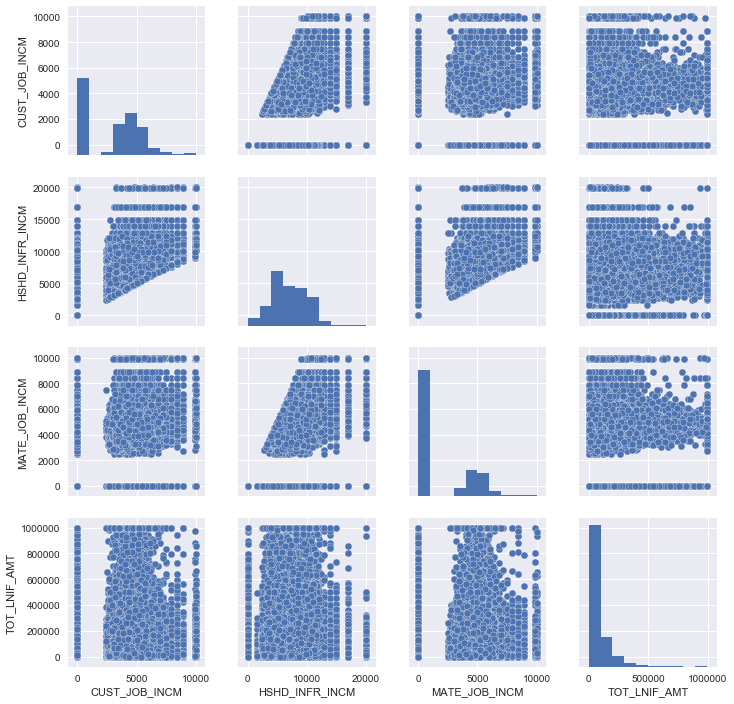

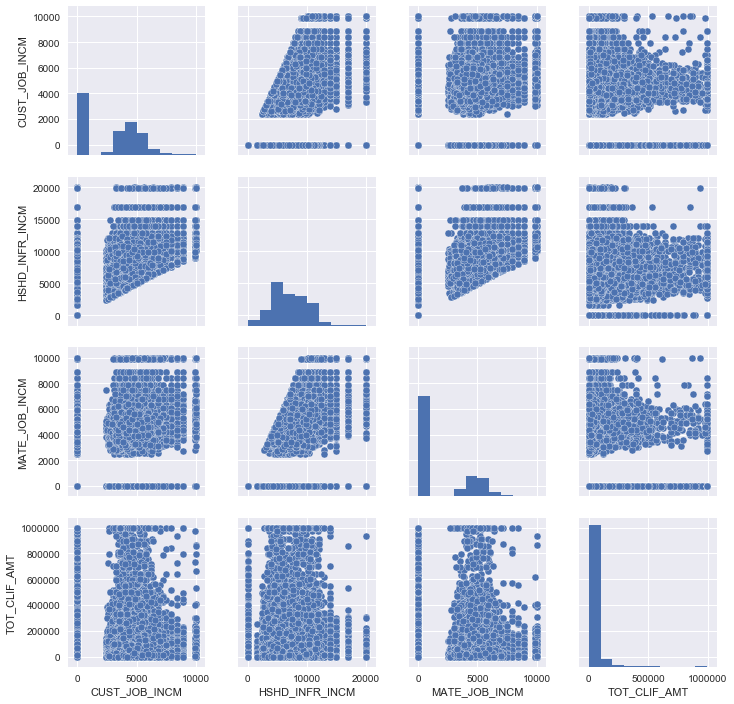

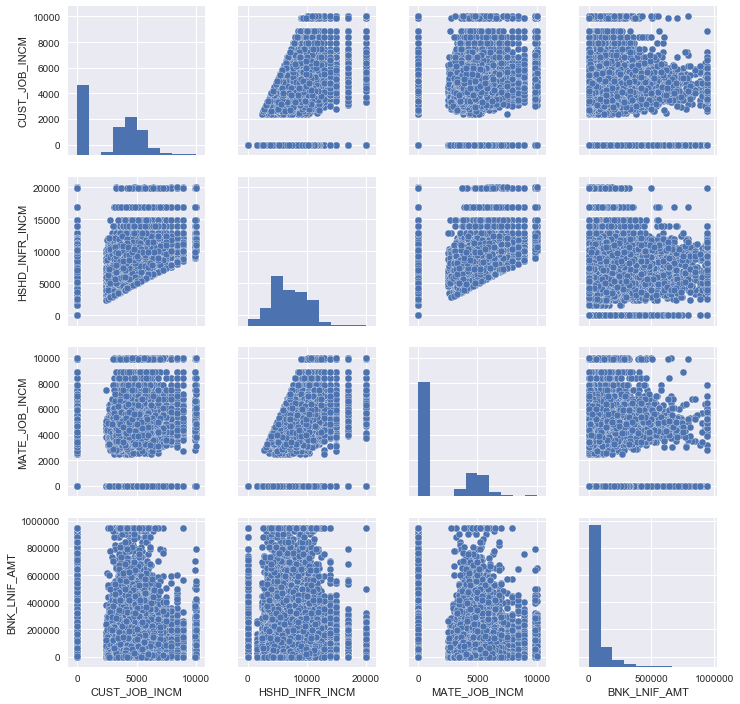

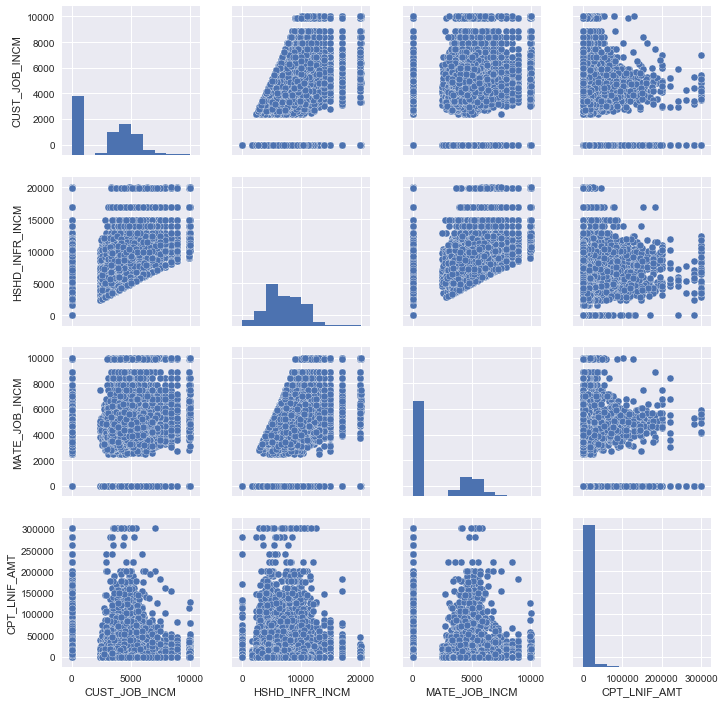

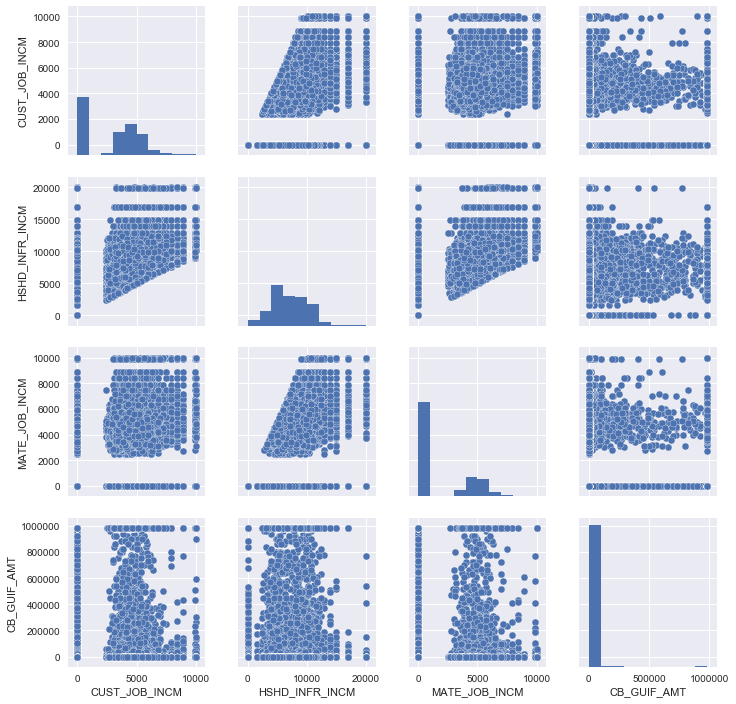

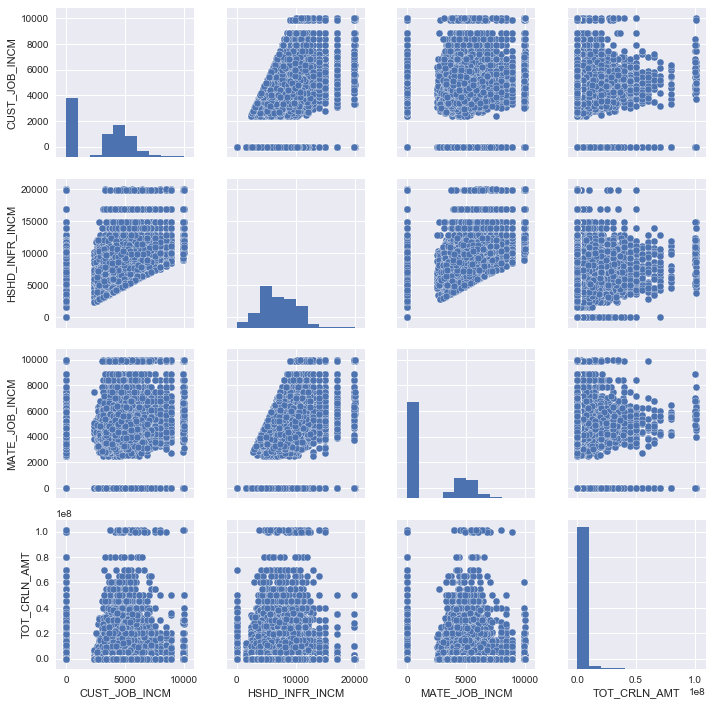

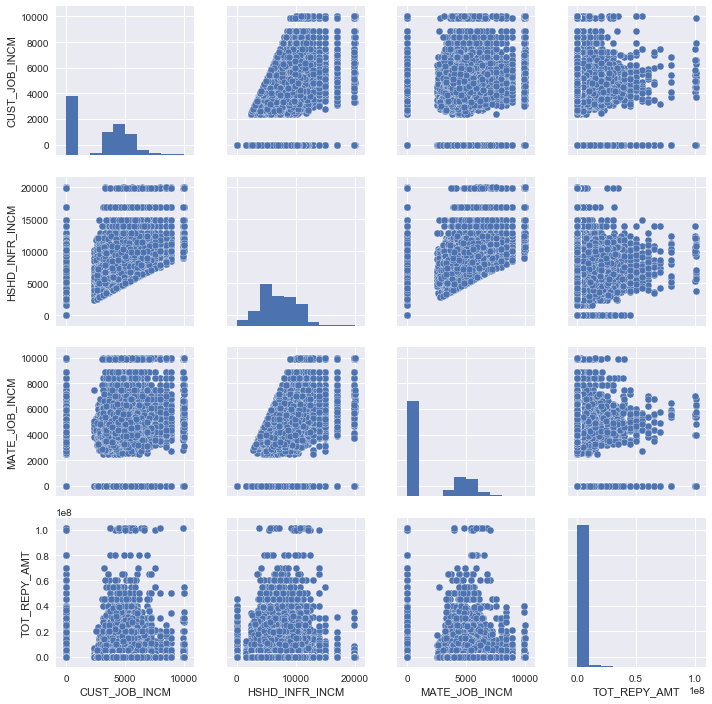

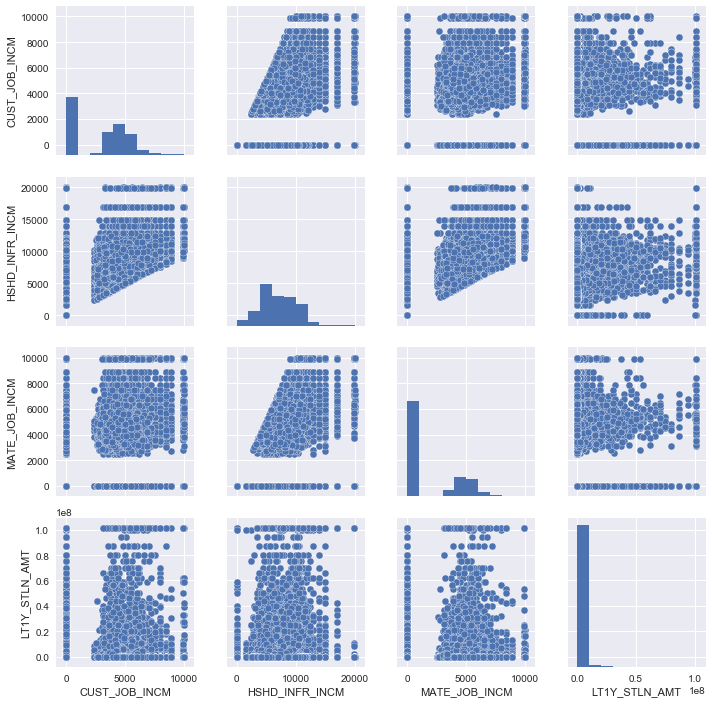

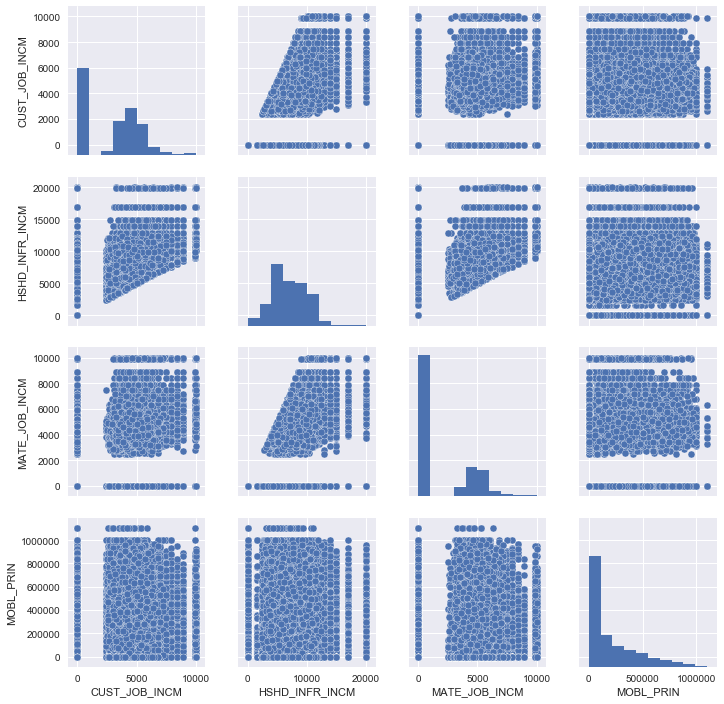

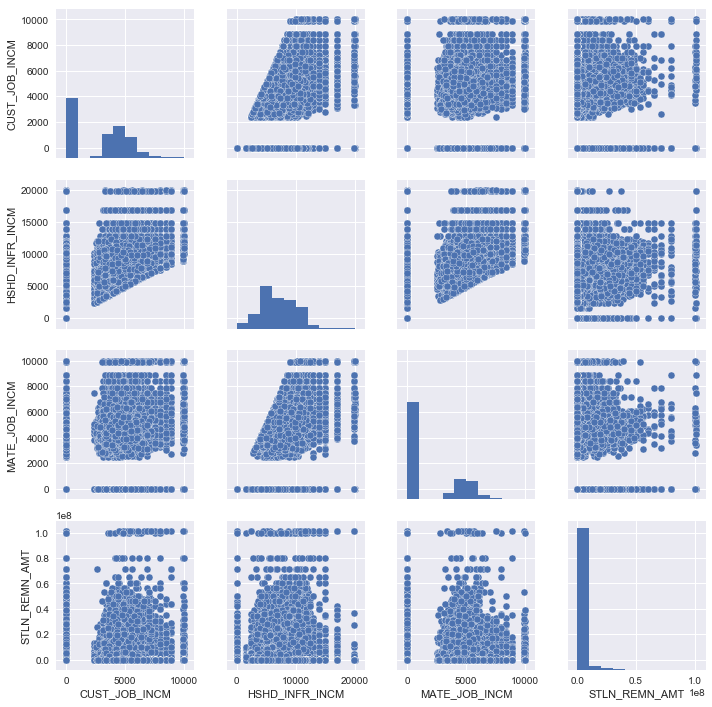

In [434]:
for i in loan_feature:
    sns.pairplot(pd.concat([check_bivariate_1, check_bivariate_2[i]], axis=1))

    plt.show()

#### 연체정보 - 